In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# 1 Data Load

In [23]:
# Dataset Link: https://data.mendeley.com/datasets/3pcn4zf54h/1

df = pd.read_csv('dataset.csv', parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010-02-09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010-02-10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010-02-11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010-02-15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010-02-16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
3109,2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
3110,2022-09-07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0
3111,2022-09-08,2588.250000,2598.000000,2571.000000,2585.399902,2585.399902,3256840,60.656396,2670.549281,2531.929304,...,2590.446181,2581.505598,1019.856298,-58.627907,-54.556808,-0.02058910806,36,80,8.940583,0


In [24]:
df = df.sort_values('Date').reset_index(drop=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Upper Bollinger band,Lower Bollinger band,...,EMA 12,EMA 26,Volume Weighted Average Price,William % R,Commodity Channel Index,Rate of Change (10 days),Aroon Up,Aroon Down,MACD,BUY/SELL
0,2010-02-09,492.209351,494.314392,486.736237,491.961700,445.888885,6595770,77.363565,538.556974,482.723033,...,507.070528,526.112973,525.687818,-82.107805,-133.346702,-0.04683073594,32,88,-19.042446,0
1,2010-02-10,495.255463,495.255463,486.389526,487.924957,442.230225,8427562,77.450994,534.379680,480.362298,...,504.125055,523.284232,524.857180,-89.479146,-126.800124,-0.04131185583,28,84,-19.159176,-1
2,2010-02-11,489.980469,505.112030,489.609009,502.808868,455.720215,10822218,73.800489,529.706166,482.283331,...,503.922565,521.767538,524.114793,-50.645372,-81.142246,-0.02121195237,24,80,-17.844973,1
3,2010-02-15,508.678253,508.678253,499.069336,500.258057,453.408264,6229609,62.190715,526.939071,481.947695,...,503.358794,520.174243,523.763755,-56.976014,-62.805145,-0.03460143653,20,76,-16.815449,-1
4,2010-02-16,500.307587,505.706421,497.781525,504.096680,456.887390,4646498,59.535849,524.309725,482.857629,...,503.472315,518.983313,523.507625,-47.449261,-61.770626,-0.02644921791,16,72,-15.510997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,2022-09-05,2531.000000,2581.500000,2531.000000,2569.800049,2569.800049,5227785,58.195854,2691.671064,2541.343236,...,2592.431907,2579.893536,1019.179252,-70.833259,-92.978210,-0.01685255365,48,0,12.538371,1
3109,2022-09-06,2573.000000,2606.000000,2572.000000,2596.850098,2596.850098,5030172,58.608005,2687.970925,2537.264810,...,2593.111629,2581.149578,1019.470203,-50.692916,-29.493616,-0.003740504732,44,0,11.962051,1
3110,2022-09-07,2575.000000,2594.899902,2570.000000,2581.750000,2581.750000,3455942,58.895007,2681.110820,2532.210643,...,2591.363686,2581.194053,1019.668841,-61.157290,-53.368680,-0.02457686557,40,0,10.169633,0
3111,2022-09-08,2588.250000,2598.000000,2571.000000,2585.399902,2585.399902,3256840,60.656396,2670.549281,2531.929304,...,2590.446181,2581.505598,1019.856298,-58.627907,-54.556808,-0.02058910806,36,80,8.940583,0


In [25]:
df = df[['Date', 'Close']].rename(columns={'Close': 'close'})
df.set_index('Date', inplace=True)
df.head()

,close
Date,
2010-02-09,491.961700
2010-02-10,487.924957
2010-02-11,502.808868
2010-02-15,500.258057
2010-02-16,504.096680


# 2 Data Visulization

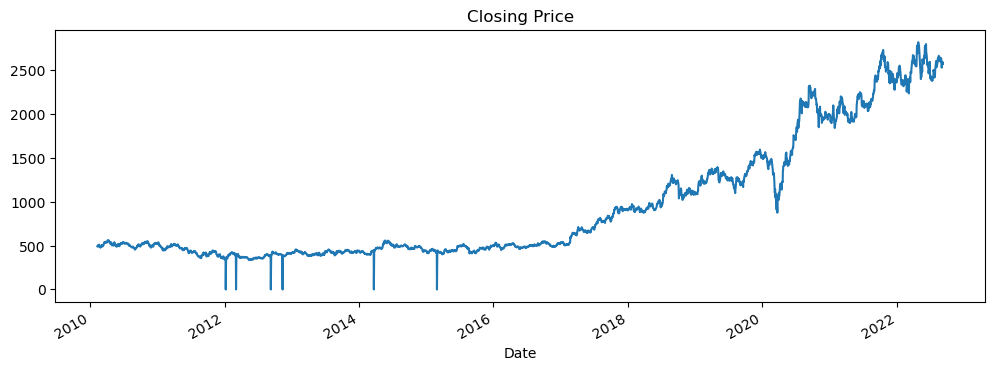

In [26]:
# Plot the closing prices
df['close'].plot(title='Closing Price', figsize=(12,4))
plt.show()

# 3 Data Preprocessing

In [27]:
## Check for missing values
df.isnull().sum()

close    0
dtype: int64

In [28]:
# Check if 'close' has any negative values
has_negative_in_col1 = (df['close'] < 0).any()
has_negative_in_col1

False

## 3.1 Decomposition

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

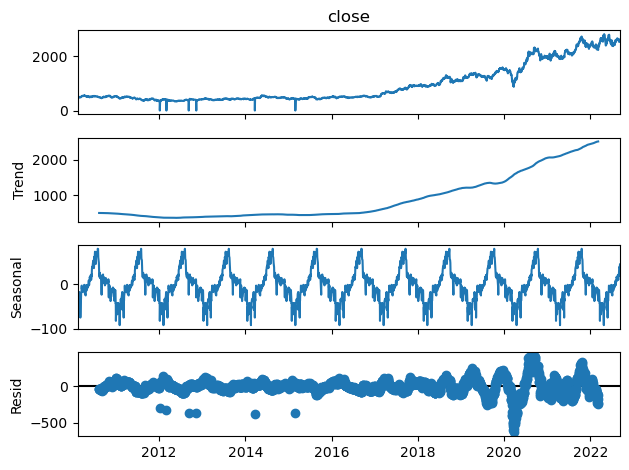

In [30]:
decomp = seasonal_decompose(df['close'], model='additive', period=252)
decomp.plot()
plt.show()

# 4 Stationarity Check

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def adf_test(series):
    res = adfuller(series.dropna())
    print('ADF Statistic:', res[0])
    print('p-value:', res[1])
    for k,v in res[4].items():
        print('Critial Values:')
        print(k, v)

adf_test(df['close'])

ADF Statistic: 0.6464651620094171
p-value: 0.9887066433562735
Critial Values:
1% -3.43245576226643
Critial Values:
5% -2.8624703946061567
Critial Values:
10% -2.567265271491845


### As the "p-value" is greater, so, the Null Hypotheses is True; Not Stationary

## 4.1 Transforming into Stationary

In [33]:
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


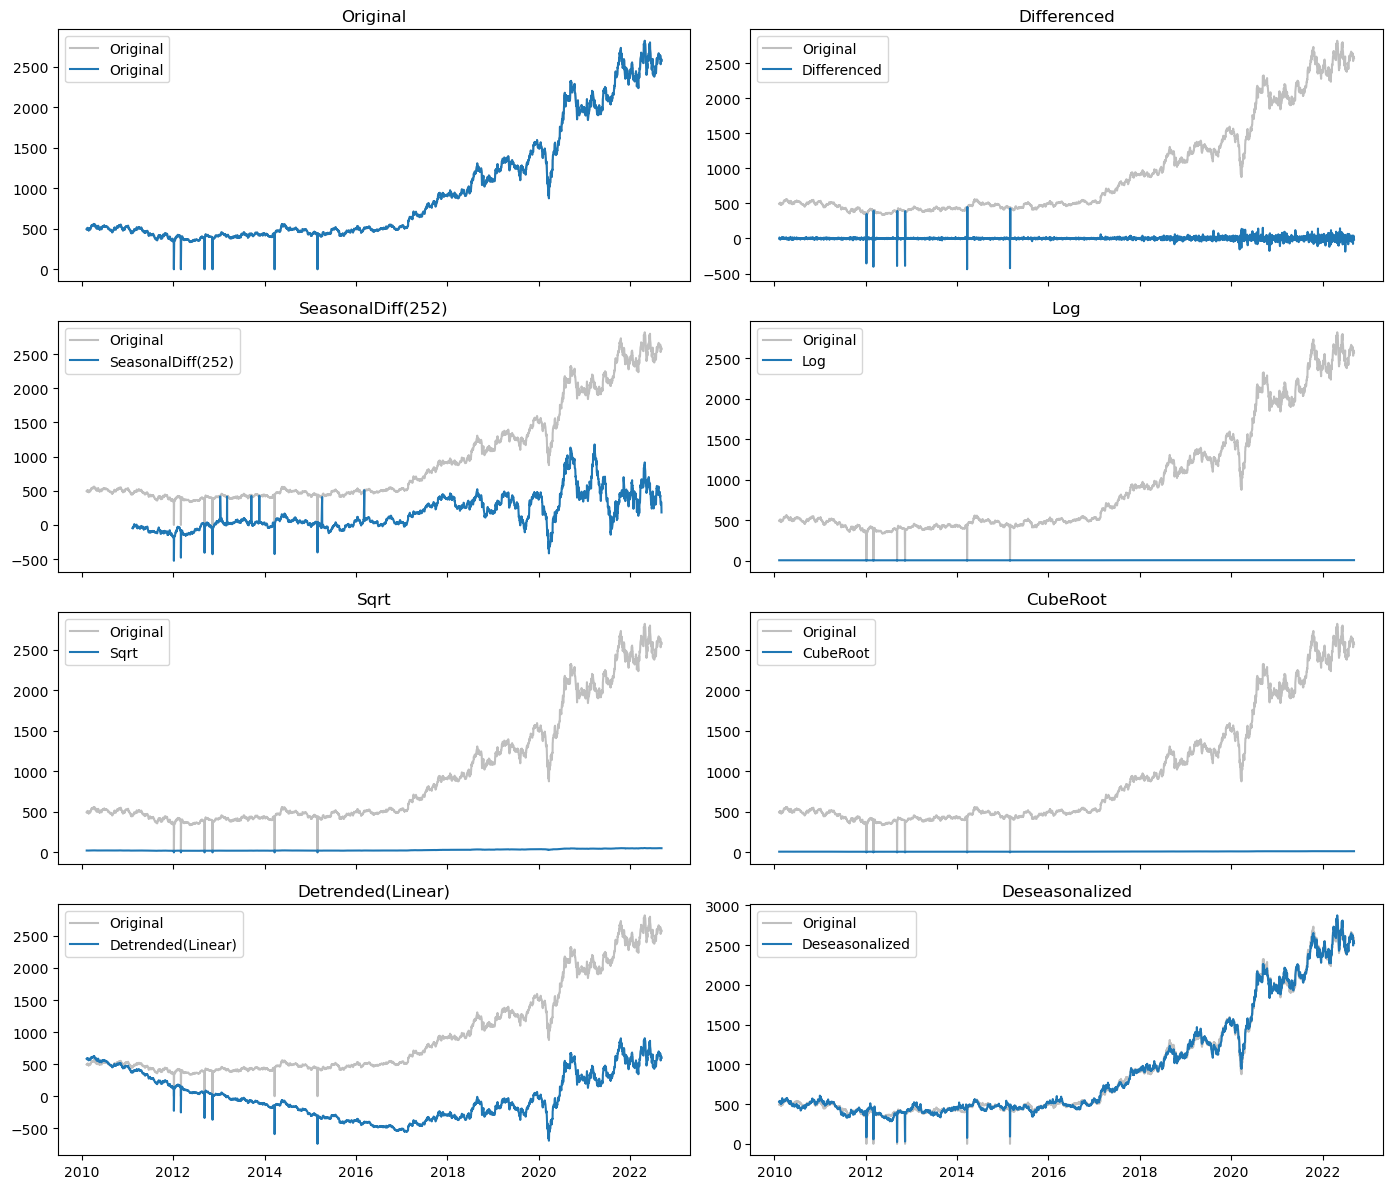

In [34]:
series = df['close'].copy()
period = 252  # trading days per year for daily stock data

# 1️ Differencing
diff_series = series.diff()

# 2️ Seasonal Differencing
seasonal_diff_series = series.diff(period)

# 3️ Log Transformation
log_series = np.log(series)
# Handle -inf if any 0 values exist
log_series.replace(-np.inf, np.nan, inplace=True)

# 4️ Square Root / Cube Root
sqrt_series = np.sqrt(series)
cuberoot_series = np.cbrt(series)

# 5️ Box–Cox Transformation (needs positive values)
boxcox_series = None
boxcox_lambda = None
if (series > 0).all():
    boxcox_series, boxcox_lambda = boxcox(series)
    boxcox_series = pd.Series(boxcox_series, index=series.index)

# 6️ Detrending (Linear)
t = np.arange(len(series)).reshape(-1, 1)
model = LinearRegression().fit(t, series.values)
trend = model.predict(t)
detrended_series = series.values - trend
detrended_series = pd.Series(detrended_series, index=series.index)

# 7️ Deseasonalizing (Seasonal Decomposition)
decomp = seasonal_decompose(series, model='additive', period=period)
deseasonalized_series = series - decomp.seasonal

# Combine into dictionary
transformations = {
    'Original': series,
    'Differenced': diff_series,
    f'SeasonalDiff({period})': seasonal_diff_series,
    'Log': log_series,
    'Sqrt': sqrt_series,
    'CubeRoot': cuberoot_series,
}

if boxcox_series is not None:
    transformations[f'BoxCox(λ={boxcox_lambda:.2f})'] = boxcox_series

transformations['Detrended(Linear)'] = detrended_series
transformations['Deseasonalized'] = deseasonalized_series

# Plot
n = len(transformations)
rows = int(np.ceil(n / 2))
fig, axes = plt.subplots(rows, 2, figsize=(14, 3*rows), sharex=True)
axes = axes.flatten()

for i, (name, ts) in enumerate(transformations.items()):
    axes[i].plot(series.index, series, label='Original', alpha=0.5, color='gray')
    axes[i].plot(ts.index, ts, label=name)
    axes[i].set_title(name)
    axes[i].legend()

for ax in axes[n:]:
    fig.delaxes(ax)  # remove empty subplots

plt.tight_layout()
plt.show()

## 4.3 ADF Test

In [35]:
def adf_test_results(series_dict):
    results = []
    for name, ts in series_dict.items():
        ts = ts.dropna()
        try:
            adf_result = adfuller(ts)
            stat, pvalue, usedlag, nobs, crit_vals, icbest = adf_result
            decision = 'Stationary' if pvalue < 0.05 else 'Non-Stationary'
            results.append({
                'Transformation': name,
                'ADF Statistic': round(stat, 4),
                'p-value': round(pvalue, 5),
                '1% CV': round(crit_vals['1%'], 4),
                '5% CV': round(crit_vals['5%'], 4),
                '10% CV': round(crit_vals['10%'], 4),
                'Decision': decision
            })
        except Exception as e:
            results.append({
                'Transformation': name,
                'ADF Statistic': np.nan,
                'p-value': np.nan,
                '1% CV': np.nan,
                '5% CV': np.nan,
                '10% CV': np.nan,
                'Decision': f'⚠️ Error: {str(e)}'
            })
    return pd.DataFrame(results).set_index('Transformation')

# Run ADF on all transformations
adf_table = adf_test_results(transformations)

# Sort by p-value (ascending)
adf_table = adf_table.sort_values('p-value', ascending=True)
adf_table

,ADF Statistic,p-value,1% CV,5% CV,10% CV,Decision
Transformation,,,,,,
Differenced,-32.4044,0.00000,-3.4325,-2.8625,-2.5673,Stationary
SeasonalDiff(252),-3.1926,0.02042,-3.4326,-2.8626,-2.5673,Stationary
Detrended(Linear),-1.6555,0.45417,-3.4325,-2.8625,-2.5673,Non-Stationary
CubeRoot,0.2333,0.97407,-3.4325,-2.8625,-2.5673,Non-Stationary
Log,0.3767,0.98060,-3.4325,-2.8625,-2.5673,Non-Stationary
Sqrt,0.4453,0.98311,-3.4325,-2.8625,-2.5673,Non-Stationary
Deseasonalized,0.6311,0.98836,-3.4325,-2.8625,-2.5673,Non-Stationary
Original,0.6465,0.98871,-3.4325,-2.8625,-2.5673,Non-Stationary


## 4.4 ACF & PACF Test

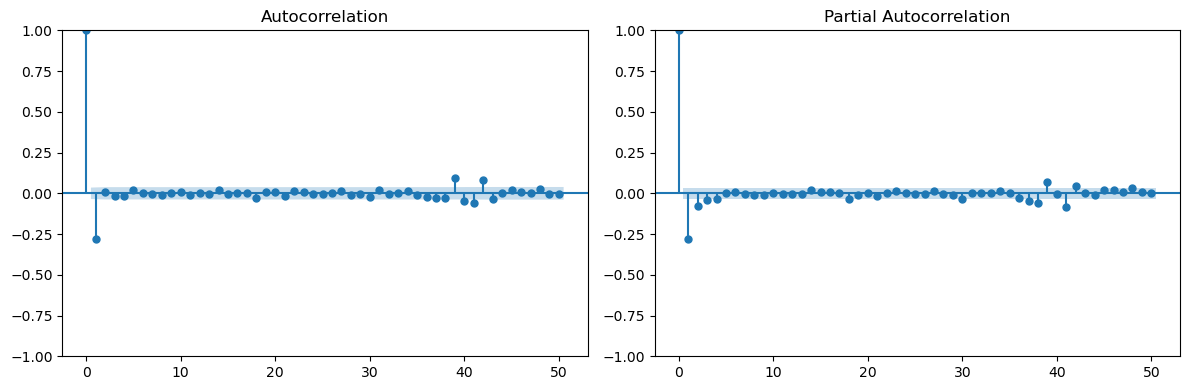

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_acf(df['close'].diff().dropna(), lags=50, ax=plt.gca())
plt.subplot(1,2,2)
plot_pacf(df['close'].diff().dropna(), lags=50, ax=plt.gca(), method='ywm')
plt.tight_layout()
plt.show()

# 5 Modeling

## 5.1 ARIMA

### 5.1.1 Gridsearch for best ARIMA

In [41]:
import itertools
import statsmodels.api as sm

In [42]:
def arima_grid_search(series, p_values, d_values, q_values, criterion='aic'):
    """
    Grid search over p,d,q for ARIMA.
    series: pandas Series (non-transformed, ARIMA will handle differencing)
    criterion: 'aic' or 'bic'
    """
    best_score, best_cfg = float("inf"), None
    results = []
    for p, d, q in itertools.product(p_values, d_values, q_values):
        order = (p,d,q)
        try:
            model = sm.tsa.ARIMA(series, order=order)
            res = model.fit()
            score = res.aic if criterion == 'aic' else res.bic
            results.append((order, res.aic, res.bic))
            if score < best_score:
                best_score, best_cfg = score, order
        except:
            continue
    result_df = pd.DataFrame(results, columns=['order','AIC','BIC']).sort_values('AIC')
    return best_cfg, result_df


In [44]:
p = range(0, 4)
d = range(0, 3)
q = range(0, 4)

best_order, search_table = arima_grid_search(df['close'], p, d, q, criterion='aic')
print(f"Best ARIMA order: {best_order}")
search_table.head(10)

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored

Best ARIMA order: (0, 2, 2)


c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,order,AIC,BIC
10,"(0, 2, 2)",30309.013059,30327.141157
5,"(0, 1, 1)",30310.274627,30322.360669
22,"(1, 2, 2)",30310.943715,30335.114513
11,"(0, 2, 3)",30310.954846,30335.125644
34,"(2, 2, 2)",30311.252260,30341.465757
17,"(1, 1, 1)",30312.240620,30330.369682
6,"(0, 1, 2)",30312.251453,30330.380516
7,"(0, 1, 3)",30312.392696,30336.564779
29,"(2, 1, 1)",30312.651658,30336.823742
23,"(1, 2, 3)",30313.009939,30343.223437


### 5.1.2 ARIMA Model Fitting

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


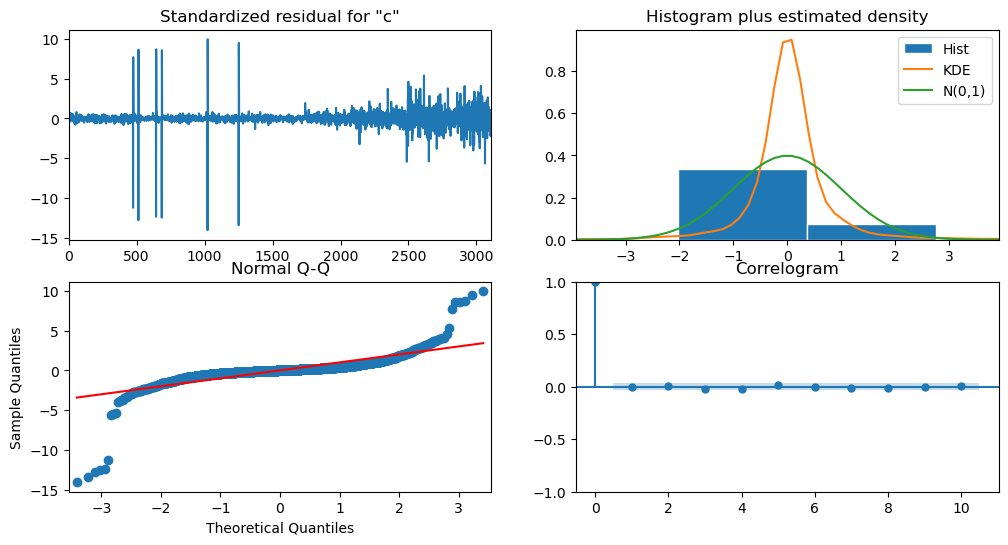

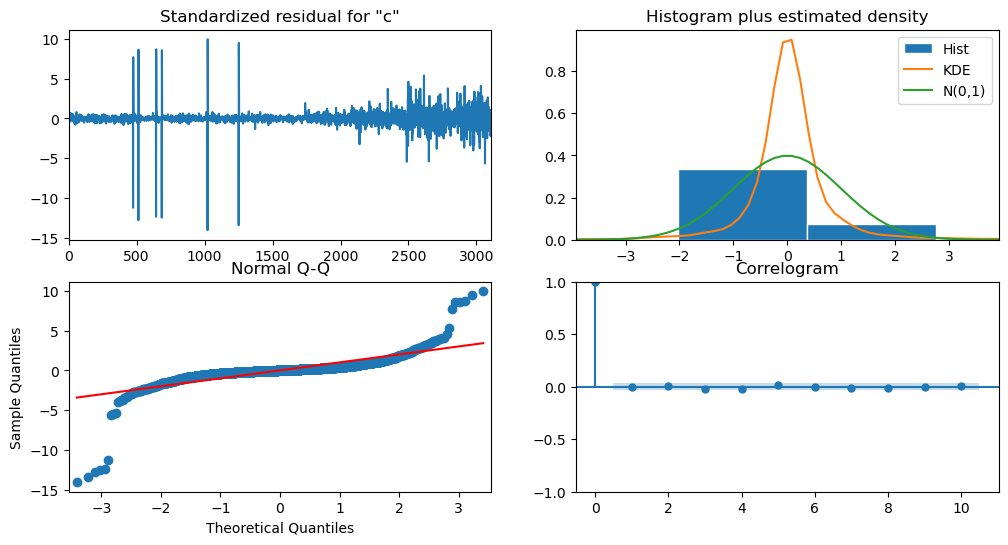

In [56]:
model_arima = sm.tsa.ARIMA(df['close'], order=best_order)
res_arima = model_arima.fit()
res_arima.plot_diagnostics(figsize=(12,6))

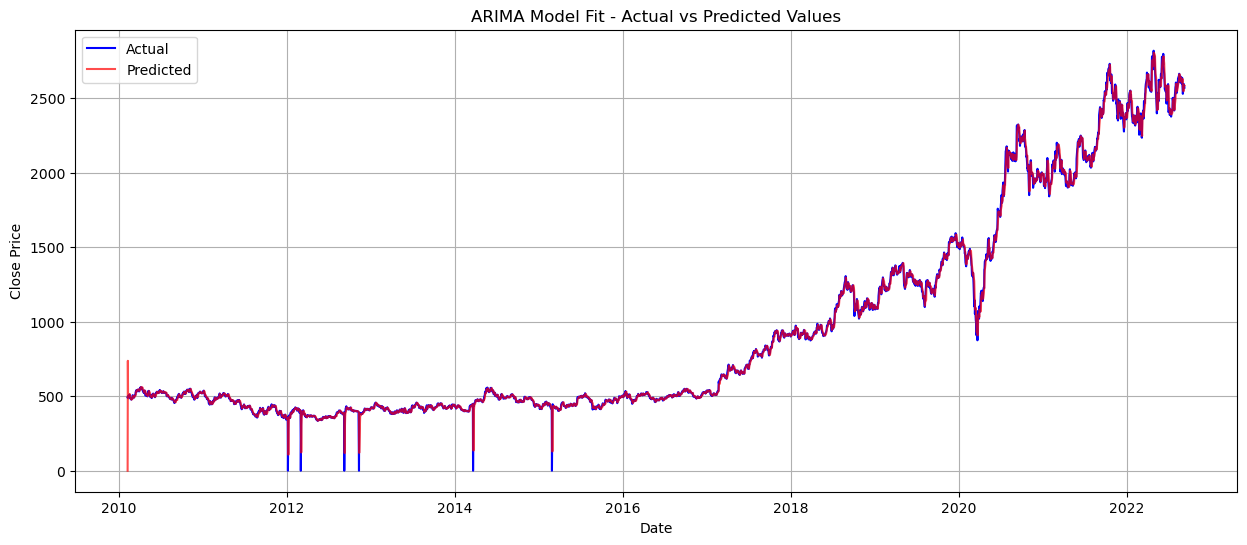


Model Performance Metrics:
Mean Absolute Error (MAE): 15.09
Root Mean Square Error (RMSE): 33.02
Mean Absolute Percentage Error (MAPE): inf%


In [57]:
# Get the fitted/predicted values from the ARIMA model
fitted_values = res_arima.fittedvalues
residuals = res_arima.resid

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['close'], label='Actual', color='blue')
plt.plot(df.index, fitted_values, label='Predicted', color='red', alpha=0.7)

plt.title('ARIMA Model Fit - Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate error metrics
mae_arima = mean_absolute_error(df['close'], fitted_values)
rmse_arima = np.sqrt(mean_squared_error(df['close'], fitted_values))
mape_arima = np.mean(np.abs((df['close'] - fitted_values) / df['close'])) * 100

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_arima:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse_arima:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_arima:.2f}%")

### 5.1.3

c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\USER\miniconda3\envs\nlp_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


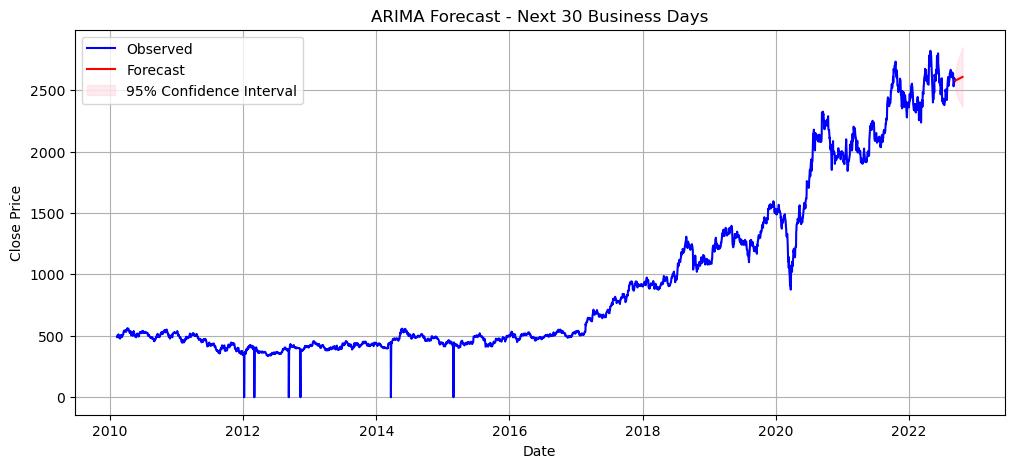


Forecast Values:
            Forecast  Lower CI  Upper CI
2022-09-12   2577.25   2515.49   2639.00
2022-09-13   2578.29   2503.15   2653.43
2022-09-14   2579.34   2492.84   2665.83
2022-09-15   2580.38   2483.84   2676.92
2022-09-16   2581.43   2475.77   2687.08
2022-09-19   2582.47   2468.42   2696.52
2022-09-20   2583.52   2461.63   2705.40
2022-09-21   2584.56   2455.31   2713.82
2022-09-22   2585.61   2449.37   2721.85
2022-09-23   2586.65   2443.76   2729.55
2022-09-26   2587.70   2438.44   2736.96
2022-09-27   2588.74   2433.36   2744.12
2022-09-28   2589.79   2428.51   2751.06
2022-09-29   2590.83   2423.86   2757.81
2022-09-30   2591.88   2419.39   2764.37
2022-10-03   2592.93   2415.08   2770.77
2022-10-04   2593.97   2410.92   2777.02
2022-10-05   2595.02   2406.89   2783.14
2022-10-06   2596.06   2402.99   2789.13
2022-10-07   2597.11   2399.20   2795.01
2022-10-10   2598.15   2395.53   2800.78
2022-10-11   2599.20   2391.95   2806.45
2022-10-12   2600.24   2388.46   2812.0

In [58]:
forecast_steps = 30
# Create future dates for forecasting
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]  # 'B' for business days

# Get forecast
forecast_result = res.get_forecast(steps=forecast_steps)
mean_forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Assign the proper dates to forecast results
mean_forecast.index = forecast_dates
conf_int.index = forecast_dates

# Plotting
plt.figure(figsize=(12,5))
plt.plot(df.index, df['close'], label='Observed', color='blue')
plt.plot(forecast_dates, mean_forecast, label='Forecast', color='red')
plt.fill_between(forecast_dates, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3,
                 label='95% Confidence Interval')

plt.title(f"ARIMA Forecast - Next {forecast_steps} Business Days")
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecast values with dates
print("\nForecast Values:")
forecast_df = pd.DataFrame({
    'Forecast': mean_forecast,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
}).round(2)
print(forecast_df)

# 6. Error Calculation

# 7 Model Comparison